# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let'
s embark on the journey of sales prediction using machine learning in Python.

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [192]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [193]:
# read the dataset to csv
sale_df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

In [194]:
# show first five rows of the dataset
sale_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [195]:
# give insights of the dataset
sale_df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [196]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [197]:
sale_df.shape

(500, 9)

In [198]:
sale_df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [199]:
count = sale_df['country'].unique().size
count

211

# TASK #3: PERFORM DATA VISUALIZATION 

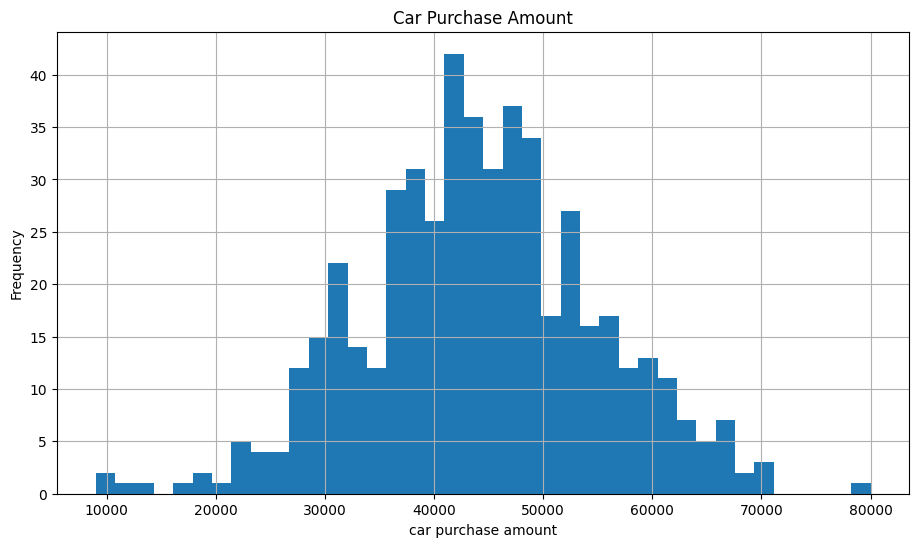

In [200]:
# plot histogram
plt.figure(figsize=[11,6])
sale_df['car purchase amount'].hist(bins=40)
plt.title('Car Purchase Amount')
plt.xlabel('car purchase amount')
plt.ylabel('Frequency')
plt.show()

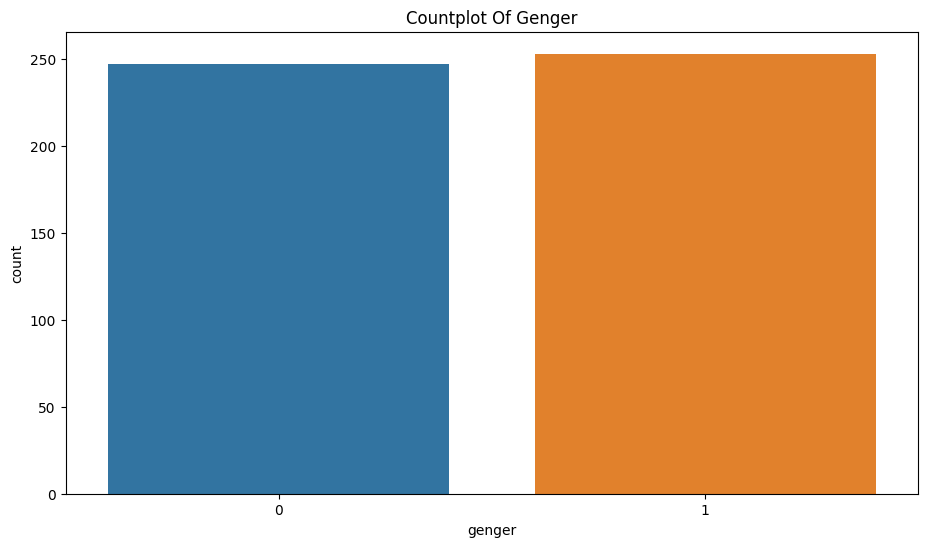

In [201]:
# countplot
plt.figure(figsize=[11,6])
sns.countplot(data = sale_df, x='gender')
plt.title('Countplot Of Genger')
plt.xlabel('genger')
plt.ylabel('count')
plt.show()

c:\Users\Umar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


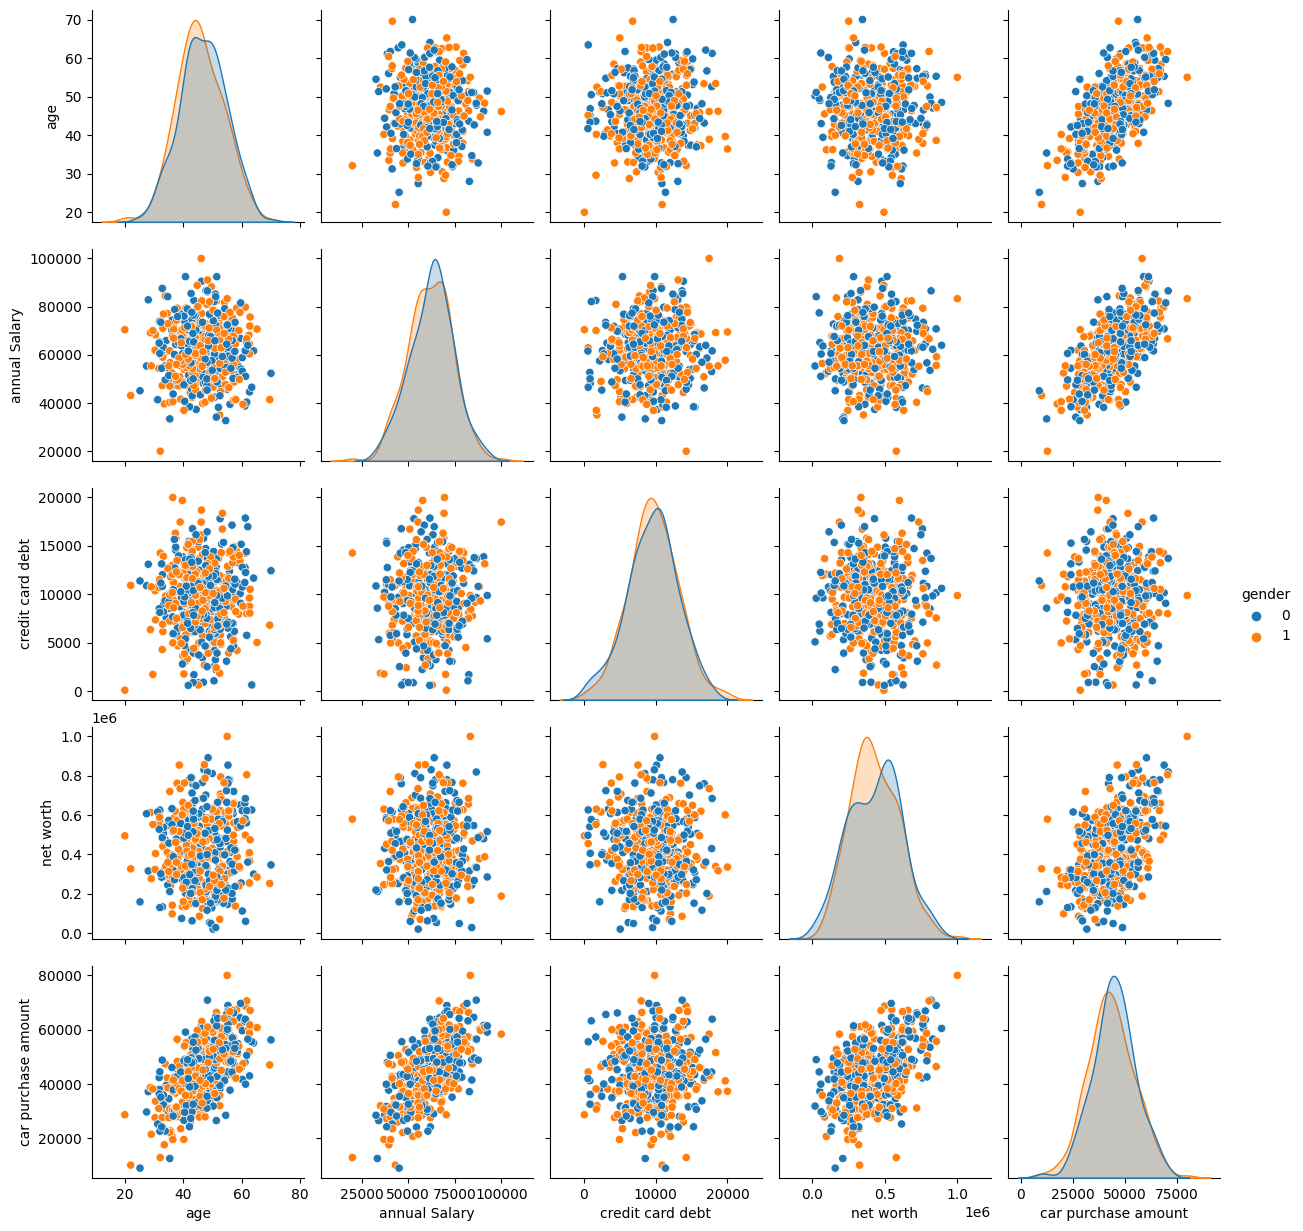

In [202]:
sns.pairplot(data=sale_df, hue='gender')
plt.show()

# TASK #4: PERFORM DATA CLEANING AND PREPROCESSING

In [203]:
# Remove unnecessary features
sale_df = sale_df.drop(['customer name', 'customer e-mail'], axis=1)

In [204]:
sale_df

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [205]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

sale_df['enc_country'] = encoder.fit_transform(sale_df['country'])
sale_df[['country', 'enc_country']].head()

,country,enc_country
0,Bulgaria,27
1,Belize,17
2,Algeria,1
3,Cook Islands,41
4,Brazil,26


In [206]:
# drop the orignal country column
sale_df.drop('country', axis=1, inplace=True)

In [207]:
sale_df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,enc_country
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,27
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,17
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,1
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,41
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,26
...,...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,128
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,208
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,144
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,24


In [208]:
# Rearrange the columns
sale_df = sale_df[['gender', 'age',	'annual Salary', 'credit card debt', 'net worth', 'enc_country', 'car purchase amount']]
sale_df

,gender,age,annual Salary,credit card debt,net worth,enc_country,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,27,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,17,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,1,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,41,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,26,55915.46248
...,...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,128,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,208,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,144,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,24,45442.15353


# TASK #5: TRAIN STANDARSCALER MODEL

In [209]:
#Let's drop the target coloumn before we do train test split
X = sale_df.drop('car purchase amount', axis = 1).values
y = sale_df['car purchase amount'].values

In [210]:
X

array([[0.00000000e+00, 4.18517198e+01, 6.28120930e+04, 1.16093809e+04,
        2.38961250e+05, 2.70000000e+01],
       [0.00000000e+00, 4.08706234e+01, 6.66468929e+04, 9.57295714e+03,
        5.30973908e+05, 1.70000000e+01],
       [1.00000000e+00, 4.31528975e+01, 5.37985511e+04, 1.11603551e+04,
        6.38467177e+05, 1.00000000e+00],
       ...,
       [1.00000000e+00, 5.39434972e+01, 6.88887780e+04, 1.06116069e+04,
        7.64531320e+05, 1.44000000e+02],
       [1.00000000e+00, 5.91605086e+01, 4.98119906e+04, 1.40130345e+04,
        3.37826638e+05, 2.40000000e+01],
       [1.00000000e+00, 4.67311525e+01, 6.13706777e+04, 9.39134163e+03,
        4.62946492e+05, 2.09000000e+02]])

In [211]:
# Split the data into test and train about 20/80
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

# Fit and transform the scaler on training data
X_train_classifier = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_classifier = scaler.transform(X_test)

In [213]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

# Input layer 
model.add(layers.Input(shape=(6,)))

# Hidden layer
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=32, activation='relu', input_dim=6))
model.add(layers.Dense(units=1, activation='linear'))  

# output layer
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [214]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100


7/7 [==============================] - 2s 32ms/step - loss: 196848944.0000 - val_loss: 170861072.0000
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 153534576.0000 - val_loss: 139223392.0000
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 117718704.0000 - val_loss: 87266832.0000
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 88194672.0000 - val_loss: 67019916.0000
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 63189972.0000 - val_loss: 47859592.0000
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 50446216.0000 - val_loss: 47541820.0000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 46240532.0000 - val_loss: 50945856.0000
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 46688744.0000 - val_loss: 49908212.0000
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 46570552.0000 - val_loss: 49163676.0000
Epoch 1

# TASK #6: ASSESS TRAINED MODEL PERFORMANCE

In [215]:
# Make predictions
Test_sample = np.array([[41, 62812, 562341, 238961, 0, 1]]) 

y_predict_test = model.predict(Test_sample)

print(f'Car Purchase Amount is = {y_predict_test[0][0]}')

1/1 [==============================] - 0s 146ms/step
Car Purchase Amount is = 280921.9375
